In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D , Dropout
from keras.utils import to_categorical , plot_model
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator

In [2]:
(x_train , y_train ) , (x_test , y_test ) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [4]:
x_train.shape , x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [5]:
y_train.shape , y_test.shape

((50000, 1), (10000, 1))

In [6]:
labels = ['airplane' , 'automobile' , 'bird' , 'cat' , 'deer' , 'dog' , 'frog' , 'horse' , 'ship' , 'truck']

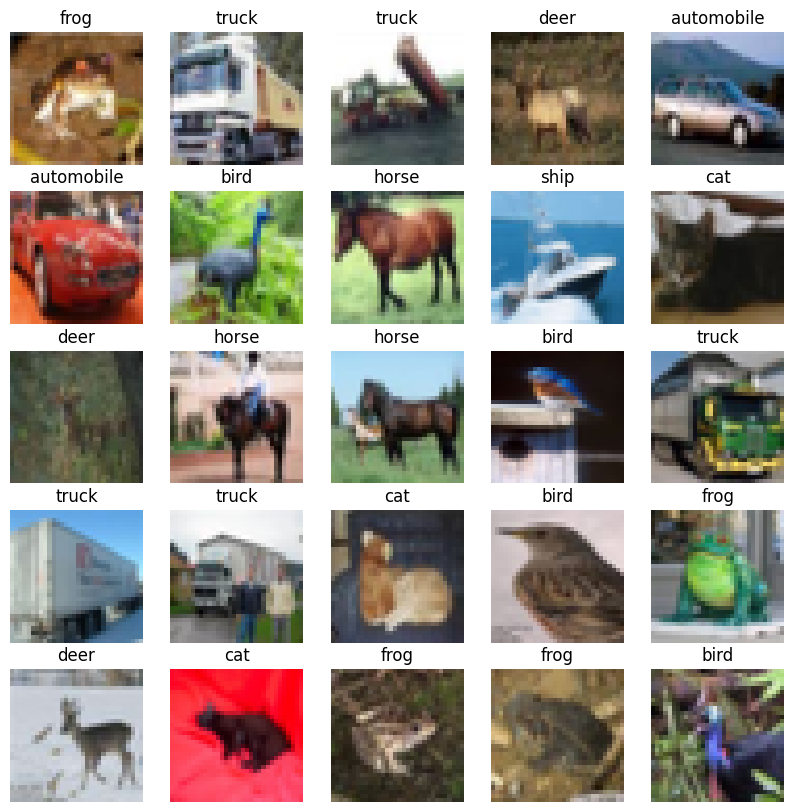

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i])
    plt.axis('off')
    plt.title(labels[y_train[i][0]])


In [12]:
## Scale the data

In [13]:
x_train = x_train/255
x_test = x_test/255

In [14]:
## Build the model

In [17]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.1))
model.add(Conv2D(16,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 576)              

In [20]:
### Compile the model

In [24]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [25]:
### train the model

In [26]:
model.fit(x_train,y_train,epochs=10,batch_size=20)

Epoch 1/10
2500/2500 [==============================] - 16s 4ms/step - loss: 1.4795 - accuracy: 0.4635
Epoch 2/10
2500/2500 [==============================] - 16s 7ms/step - loss: 1.1436 - accuracy: 0.5941
Epoch 3/10
2500/2500 [==============================] - 14s 5ms/step - loss: 0.9844 - accuracy: 0.6539
Epoch 4/10
2500/2500 [==============================] - 13s 5ms/step - loss: 0.8837 - accuracy: 0.6902
Epoch 5/10
2500/2500 [==============================] - 10s 4ms/step - loss: 0.8027 - accuracy: 0.7172
Epoch 6/10
2500/2500 [==============================] - 10s 4ms/step - loss: 0.7343 - accuracy: 0.7390
Epoch 7/10
2500/2500 [==============================] - 9s 4ms/step - loss: 0.6722 - accuracy: 0.7621
Epoch 8/10
2500/2500 [==============================] - 10s 4ms/step - loss: 0.6251 - accuracy: 0.7766
Epoch 9/10
2500/2500 [==============================] - 10s 4ms/step - loss: 0.5757 - accuracy: 0.7966
Epoch 10/10
2500/2500 [==============================] - 10s 4ms/step - lo

In [27]:
### Evaluate the model

In [29]:
model.evaluate(x_test,y_test,batch_size=1)

10000/10000 [==============================] - 30s 3ms/step - loss: 1.0365 - accuracy: 0.6769


[1.0365372896194458, 0.6769000291824341]

In [30]:
### Predict the new image

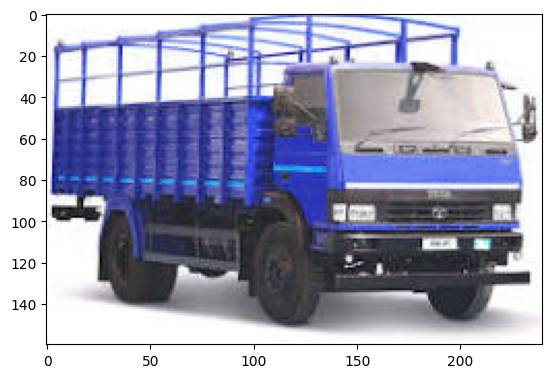

In [45]:
import cv2
img = cv2.imread('images.jpg')
plt.imshow(img)

In [52]:
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (32,32))
img = img/255

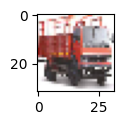

In [53]:
plt.figure(figsize=(1,1))
plt.imshow(img)

In [56]:
img =  img.reshape(1,32,32,3)
labels[model.predict(img).argmax()]

1/1 [==============================] - 0s 18ms/step


'truck'